In [1]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 751 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 201 kB 45.4 MB/s 
     |████████████████████████████████| 8.8 MB 45.0 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 468 kB 60.2 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=ec327fe0bc329ab0678672c40291563085cfc722ee51bc52ef85b04cd83b355c
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [3]:
from google.colab import files
uploaded = files.upload()

Saving bfi.csv to bfi (1).csv


In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [13]:
df=pd.read_csv("bfi.csv")
print(df)

      Unnamed: 0   A1   A2   A3   A4   A5   C1   C2   C3   C4  ...   N4   N5  \
0          61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  ...  2.0  3.0   
1          61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  ...  5.0  5.0   
2          61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  ...  2.0  3.0   
3          61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  ...  4.0  1.0   
4          61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  ...  4.0  3.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2795       67551  6.0  1.0  3.0  3.0  3.0  6.0  6.0  6.0  1.0  ...  NaN  1.0   
2796       67552  2.0  4.0  4.0  3.0  5.0  2.0  3.0  4.0  4.0  ...  3.0  3.0   
2797       67556  2.0  3.0  5.0  2.0  5.0  5.0  5.0  5.0  1.0  ...  3.0  1.0   
2798       67559  5.0  2.0  2.0  4.0  4.0  5.0  5.0  5.0  2.0  ...  4.0  1.0   
2799       67560  2.0  3.0  1.0  4.0  2.0  5.0  5.0  3.0  3.0  ...  1.0  1.0   

       O1  O2   O3   O4   O5  gender  e

In [14]:
df.drop(["Unnamed: 0","gender","education","age"],axis=1,inplace=True)

In [16]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  
 22  

In [18]:
# factor analyzer
fa=FactorAnalyzer(n_factors=6,rotation="varimax")

In [19]:
# On line 18 we created out analyzer then we fir that analyzer in variable fa, we are fittind our data into an aanlyzer
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [20]:
# here varimax is a rotation there are dufferent kind  of rorations these do come under api documentation 

In [21]:
# creating loadings 
Load=fa.loadings_

In [22]:
# making eigen values to check cross loading
# vector = communality 
ev,v=fa.get_eigenvalues()

In [24]:
xvals=range(1,df.shape[1]+1)

[]

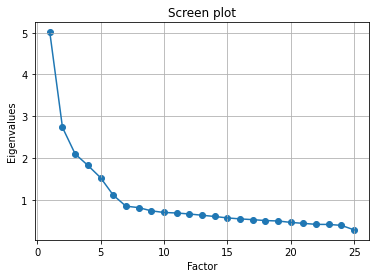

In [25]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title("Screen plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalues")
plt.grid()
plt.plot()

In [27]:
pd.DataFrame.from_records(Load)

,0,1,2,3,4,5
0,0.097528,0.037128,0.053857,-0.522915,0.140166,0.163919
1,0.032937,0.227528,0.139019,0.645446,-0.062075,0.011481
2,-0.014661,0.343562,0.118134,0.593918,-0.015815,0.150025
3,-0.078329,0.195525,0.234253,0.391401,0.130919,0.075741
4,-0.144837,0.414092,0.109054,0.463465,0.005674,0.235017
5,-0.010766,0.070517,0.542204,-0.009397,-0.158301,0.110617
6,0.062844,0.035616,0.674352,0.061709,-0.055994,0.158368
7,-0.031286,0.029948,0.541124,0.109318,0.013146,0.003876
8,0.218693,-0.064916,-0.607214,-0.110255,0.183942,0.307498
9,0.284743,-0.174470,-0.533250,-0.073719,-0.003989,0.155319
